# Importing Necessary Modules

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas import Series,DataFrame
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Functions used later in the program

In [141]:
def dis_scatter(x,y):
    fig = px.scatter_matrix(x,dimensions=y,color=x["Rating_Labels"])
    fig.update_traces(diagonal_visible=False)
    fig.show()

# Reading The file and describing the Data

In [142]:
data=pd.read_csv("epi_r.csv")

In [143]:
data.describe()

rating      calories        protein           fat        sodium  \
count  20052.000000  1.593500e+04   15890.000000  1.586900e+04  1.593300e+04   
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.590460e+05    3840.318527  2.045611e+04  3.333182e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.980000e+02       3.000000  7.000000e+00  8.000000e+01   
50%        4.375000  3.310000e+02       8.000000  1.700000e+01  2.940000e+02   
75%        4.375000  5.860000e+02      27.000000  3.300000e+01  7.110000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  20052.000000  20052.000000     20052.000000          20052.000000   
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105              0.036671   
min        0.000000      0.000000         0.000000              0.000000   
25%        0.000000      0.000000         0.000000              0.000000   
50%        0.000000      0.000000         0.000000              0.000000   
75%        0.000000      0.000000         0.000000              0.000000   
max        1.000000      1.000000         1.000000              1.000000   

       30 days of groceries  ...  yellow squash        yogurt       yonkers  \
count          20052.000000  ...   20052.000000  20052.000000  20052.000000   
mean               0.000349  ...       0.001247      0.026332      0.000050   
std                0.018681  ...       0.035288      0.160123      0.007062   
min                0.000000  ...       0.000000      0.000000      0.000000   
25%                0.000000  ...       0.000000      0.000000      0.000000   
50%                0.000000  ...       0.000000      0.000000      0.000000   
75%                0.000000  ...       0.000000      0.000000      0.000000   
max                1.000000  ...       1.000000      1.000000      1.000000   

               yuca      zucchini     cookbooks     leftovers         snack  \
count  20052.000000  20052.000000  20052.000000  20052.000000  20052.000000   
mean       0.000299      0.014861      0.000150      0.000349      0.001396   
std        0.017296      0.121001      0.012231      0.018681      0.037343   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         snack week        turkey  
count  20052.000000  20052.000000  
mean       0.000948      0.022741  
std        0.030768      0.149080  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 679 columns]

# Finding Duplicates and Removing them

In [144]:
no_of_duplicates=data.duplicated().sum()
print("Number of dupliacte records in the dataset are {}".format(no_of_duplicates))
data.drop_duplicates(inplace=True)
no_of_duplicates=data.duplicated().sum()
print("Number of duplicate records in the dataset after removing duplicates are {}".format(no_of_duplicates))

Number of dupliacte records in the dataset are 1801
Number of duplicate records in the dataset after removing duplicates are 0


In [145]:
data.shape

(18251, 680)

# Dropping Unwanted Columns and seperating columns

In [146]:
data=data.drop("title",axis=1)

In [147]:
unique_count=DataFrame(data.nunique())
unique_count

0
rating         8
calories    1858
protein      282
fat          326
sodium      2434
...          ...
cookbooks      2
leftovers      2
snack          2
snack week     2
turkey         2

[679 rows x 1 columns]

In [148]:
cols=list(data.columns)
continuos_columns=unique_count[unique_count[0]>2]
categorical_columns=unique_count[unique_count[0]==2]
continuos_columns=list(continuos_columns.to_dict()[0].keys())
categorical_columns=list(categorical_columns.to_dict()[0].keys())

In [149]:
categorical_columns=list(Series(categorical_columns).unique())

# Adding Necessary Columns

In [150]:
ratings=list(data['rating'])
rating_labels=list()
for i in ratings:
    if(0<=i<=1):
        rating_labels.append("Very Bad")
    elif(1<i<=2):
        rating_labels.append("Bad")
    elif(2<i<=3):
        rating_labels.append("Average")
    elif(3<i<=4):
        rating_labels.append("Good")
    elif(4<i<=5):
        rating_labels.append("Excellent")
print(len(rating_labels))
data["Rating_Labels"]=list(Series(rating_labels))
cols.append("Rating_Labels")
categorical_columns.append("Rating_Labels")

18251


In [151]:
data.head()

rating  calories  protein   fat  sodium  #cakeweek  #wasteless  \
0   2.500     426.0     30.0   7.0   559.0        0.0         0.0   
1   4.375     403.0     18.0  23.0  1439.0        0.0         0.0   
2   3.750     165.0      6.0   7.0   165.0        0.0         0.0   
3   5.000       NaN      NaN   NaN     NaN        0.0         0.0   
4   3.125     547.0     20.0  32.0   452.0        0.0         0.0   

   22-minute meals  3-ingredient recipes  30 days of groceries  ...  yogurt  \
0              0.0                   0.0                   0.0  ...     0.0   
1              0.0                   0.0                   0.0  ...     0.0   
2              0.0                   0.0                   0.0  ...     0.0   
3              0.0                   0.0                   0.0  ...     0.0   
4              0.0                   0.0                   0.0  ...     0.0   

   yonkers  yuca  zucchini  cookbooks  leftovers  snack  snack week  turkey  \
0      0.0   0.0       0.0        0.0        0.0    0.0         0.0     1.0   
1      0.0   0.0       0.0        0.0        0.0    0.0         0.0     0.0   
2      0.0   0.0       0.0        0.0        0.0    0.0         0.0     0.0   
3      0.0   0.0       0.0        0.0        0.0    0.0         0.0     0.0   
4      0.0   0.0       0.0        0.0        0.0    0.0         0.0     0.0   

   Rating_Labels  
0        Average  
1      Excellent  
2           Good  
3      Excellent  
4           Good  

[5 rows x 680 columns]

# Finding And Replacing Null Values

In [152]:
nullvals={}
greater_than_zero_null={} #placing Those columns having greater than 0 Null vals into a seperate dictionary
for i in range(len(cols)):
    temp=(data[cols[i]].isnull().sum())
    nullvals[cols[i]]=temp
    if(temp>0):
        greater_than_zero_null[cols[i]]=temp


In [153]:
greater_than_zero_null

{'calories': 3749, 'protein': 3781, 'fat': 3801, 'sodium': 3750}

Text(0.5, 1.0, 'Missing Values')

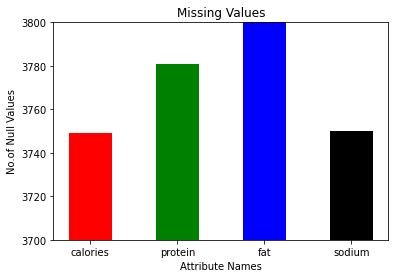

In [154]:
k1=list(greater_than_zero_null.keys())
v1=list(greater_than_zero_null.values())
plt.bar(k1,v1,color=['r','g','b','k'],width=0.5)
plt.ylim(min(v1).round(-2),max(v1).round(-2))
plt.xlabel("Attribute Names")
plt.ylabel("No.of Null Values")
plt.title("Missing Values")

# Filling Null values in Continuous Data

In [155]:
data=data.interpolate()

In [156]:
for i in range(len(cols)):
    temp=(data[cols[i]].isnull().sum())
    print("Column name is {} and number or null values are {}".format(cols[i],temp))
   

Column name is rating and number or null values are 0
Column name is calories and number or null values are 0
Column name is protein and number or null values are 0
Column name is fat and number or null values are 0
Column name is sodium and number or null values are 0
Column name is #cakeweek and number or null values are 0
Column name is #wasteless and number or null values are 0
Column name is 22-minute meals and number or null values are 0
Column name is 3-ingredient recipes and number or null values are 0
Column name is 30 days of groceries and number or null values are 0
Column name is advance prep required and number or null values are 0
Column name is alabama and number or null values are 0
Column name is alaska and number or null values are 0
Column name is alcoholic and number or null values are 0
Column name is almond and number or null values are 0
Column name is amaretto and number or null values are 0
Column name is anchovy and number or null values are 0
Column name is a

In [157]:
data

rating  calories  protein   fat  sodium  #cakeweek  #wasteless  \
0       2.500     426.0     30.0   7.0   559.0        0.0         0.0   
1       4.375     403.0     18.0  23.0  1439.0        0.0         0.0   
2       3.750     165.0      6.0   7.0   165.0        0.0         0.0   
3       5.000     356.0     13.0  19.5   308.5        0.0         0.0   
4       3.125     547.0     20.0  32.0   452.0        0.0         0.0   
...       ...       ...      ...   ...     ...        ...         ...   
20047   3.125      28.0      2.0   2.0    64.0        0.0         0.0   
20048   4.375     671.0     22.0  28.0   583.0        0.0         0.0   
20049   4.375     563.0     31.0  38.0   652.0        0.0         0.0   
20050   4.375     631.0     45.0  24.0   517.0        0.0         0.0   
20051   4.375     560.0     73.0  10.0  3698.0        0.0         0.0   

       22-minute meals  3-ingredient recipes  30 days of groceries  ...  \
0                  0.0                   0.0                   0.0  ...   
1                  0.0                   0.0                   0.0  ...   
2                  0.0                   0.0                   0.0  ...   
3                  0.0                   0.0                   0.0  ...   
4                  0.0                   0.0                   0.0  ...   
...                ...                   ...                   ...  ...   
20047              0.0                   0.0                   0.0  ...   
20048              0.0                   0.0                   0.0  ...   
20049              0.0                   0.0                   0.0  ...   
20050              0.0                   0.0                   0.0  ...   
20051              0.0                   0.0                   0.0  ...   

       yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  snack  \
0         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
1         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
2         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
3         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
4         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
...       ...      ...   ...       ...        ...        ...    ...   
20047     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20048     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20049     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20050     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20051     0.0      0.0   0.0       0.0        0.0        0.0    0.0   

       snack week  turkey  Rating_Labels  
0             0.0     1.0        Average  
1             0.0     0.0      Excellent  
2             0.0     0.0           Good  
3             0.0     0.0      Excellent  
4             0.0     0.0           Good  
...           ...     ...            ...  
20047         0.0     0.0           Good  
20048         0.0     0.0      Excellent  
20049         0.0     1.0      Excellent  
20050         0.0     0.0      Excellent  
20051         0.0     0.0      Excellent  

[18251 rows x 680 columns]

# Removing Outliers in each column

In [158]:
data

rating  calories  protein   fat  sodium  #cakeweek  #wasteless  \
0       2.500     426.0     30.0   7.0   559.0        0.0         0.0   
1       4.375     403.0     18.0  23.0  1439.0        0.0         0.0   
2       3.750     165.0      6.0   7.0   165.0        0.0         0.0   
3       5.000     356.0     13.0  19.5   308.5        0.0         0.0   
4       3.125     547.0     20.0  32.0   452.0        0.0         0.0   
...       ...       ...      ...   ...     ...        ...         ...   
20047   3.125      28.0      2.0   2.0    64.0        0.0         0.0   
20048   4.375     671.0     22.0  28.0   583.0        0.0         0.0   
20049   4.375     563.0     31.0  38.0   652.0        0.0         0.0   
20050   4.375     631.0     45.0  24.0   517.0        0.0         0.0   
20051   4.375     560.0     73.0  10.0  3698.0        0.0         0.0   

       22-minute meals  3-ingredient recipes  30 days of groceries  ...  \
0                  0.0                   0.0                   0.0  ...   
1                  0.0                   0.0                   0.0  ...   
2                  0.0                   0.0                   0.0  ...   
3                  0.0                   0.0                   0.0  ...   
4                  0.0                   0.0                   0.0  ...   
...                ...                   ...                   ...  ...   
20047              0.0                   0.0                   0.0  ...   
20048              0.0                   0.0                   0.0  ...   
20049              0.0                   0.0                   0.0  ...   
20050              0.0                   0.0                   0.0  ...   
20051              0.0                   0.0                   0.0  ...   

       yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  snack  \
0         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
1         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
2         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
3         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
4         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
...       ...      ...   ...       ...        ...        ...    ...   
20047     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20048     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20049     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20050     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20051     0.0      0.0   0.0       0.0        0.0        0.0    0.0   

       snack week  turkey  Rating_Labels  
0             0.0     1.0        Average  
1             0.0     0.0      Excellent  
2             0.0     0.0           Good  
3             0.0     0.0      Excellent  
4             0.0     0.0           Good  
...           ...     ...            ...  
20047         0.0     0.0           Good  
20048         0.0     0.0      Excellent  
20049         0.0     1.0      Excellent  
20050         0.0     0.0      Excellent  
20051         0.0     0.0      Excellent  

[18251 rows x 680 columns]

In [159]:
temp_dict={}
data_after_out=data
con_cols=continuos_columns[1:]
for i in con_cols:
    q1=data_after_out[i].describe()['25%']
    q3=data_after_out[i].describe()['75%']
    iqr=q3-q1
    temp_dict[i]=[q1,q3,iqr]


In [160]:
for i in list(temp_dict.keys()):
    q1=temp_dict[i][0]
    q3=temp_dict[i][1]
    iqr=temp_dict[i][2]
    data_after_out=data_after_out[(q1-1.5*iqr)<=data_after_out[i]]
    data_after_out=data_after_out[data_after_out[i]<=q3+1.5*iqr]
    print("Length after each outlier is removed from columns is",len(data_after_out))

Length after each outlier is removed from columns is 17102
Length after each outlier is removed from columns is 16588
Length after each outlier is removed from columns is 16333
Length after each outlier is removed from columns is 15689


In [161]:
print("Number of outliers is {} ".format(len(data)-len(data_after_out)))

Number of outliers is 2562 


# Data after Removing outliers

In [162]:
data_after_out

rating  calories  protein   fat  sodium  #cakeweek  #wasteless  \
0       2.500     426.0     30.0   7.0   559.0        0.0         0.0   
1       4.375     403.0     18.0  23.0  1439.0        0.0         0.0   
2       3.750     165.0      6.0   7.0   165.0        0.0         0.0   
3       5.000     356.0     13.0  19.5   308.5        0.0         0.0   
4       3.125     547.0     20.0  32.0   452.0        0.0         0.0   
...       ...       ...      ...   ...     ...        ...         ...   
20044   3.750      84.0      0.0   0.0     5.0        0.0         0.0   
20047   3.125      28.0      2.0   2.0    64.0        0.0         0.0   
20048   4.375     671.0     22.0  28.0   583.0        0.0         0.0   
20049   4.375     563.0     31.0  38.0   652.0        0.0         0.0   
20050   4.375     631.0     45.0  24.0   517.0        0.0         0.0   

       22-minute meals  3-ingredient recipes  30 days of groceries  ...  \
0                  0.0                   0.0                   0.0  ...   
1                  0.0                   0.0                   0.0  ...   
2                  0.0                   0.0                   0.0  ...   
3                  0.0                   0.0                   0.0  ...   
4                  0.0                   0.0                   0.0  ...   
...                ...                   ...                   ...  ...   
20044              0.0                   0.0                   0.0  ...   
20047              0.0                   0.0                   0.0  ...   
20048              0.0                   0.0                   0.0  ...   
20049              0.0                   0.0                   0.0  ...   
20050              0.0                   0.0                   0.0  ...   

       yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  snack  \
0         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
1         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
2         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
3         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
4         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
...       ...      ...   ...       ...        ...        ...    ...   
20044     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20047     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20048     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20049     0.0      0.0   0.0       0.0        0.0        0.0    0.0   
20050     0.0      0.0   0.0       0.0        0.0        0.0    0.0   

       snack week  turkey  Rating_Labels  
0             0.0     1.0        Average  
1             0.0     0.0      Excellent  
2             0.0     0.0           Good  
3             0.0     0.0      Excellent  
4             0.0     0.0           Good  
...           ...     ...            ...  
20044         0.0     0.0           Good  
20047         0.0     0.0           Good  
20048         0.0     0.0      Excellent  
20049         0.0     1.0      Excellent  
20050         0.0     0.0      Excellent  

[15689 rows x 680 columns]

In [163]:
data_after_out.describe()

rating      calories       protein           fat        sodium  \
count  15689.000000  15689.000000  15689.000000  15689.000000  15689.000000   
mean       3.690723    363.851338     13.542774     19.547628    381.401633   
std        1.349990    217.076482     14.043926     15.352425    374.651559   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.750000    202.000000      3.000000      8.000000     84.000000   
50%        4.375000    315.500000      8.000000     16.000000    260.000000   
75%        4.375000    496.500000     20.000000     28.000000    574.500000   
max        5.000000   1168.000000     64.000000     71.333333   1682.000000   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  15689.000000  15689.000000     15689.000000          15689.000000   
mean       0.000255      0.000064         0.000637              0.001466   
std        0.015966      0.007984         0.025239              0.038261   
min        0.000000      0.000000         0.000000              0.000000   
25%        0.000000      0.000000         0.000000              0.000000   
50%        0.000000      0.000000         0.000000              0.000000   
75%        0.000000      0.000000         0.000000              0.000000   
max        1.000000      1.000000         1.000000              1.000000   

       30 days of groceries  ...  yellow squash        yogurt       yonkers  \
count          15689.000000  ...   15689.000000  15689.000000  15689.000000   
mean               0.000255  ...       0.001530      0.028173      0.000064   
std                0.015966  ...       0.039083      0.165471      0.007984   
min                0.000000  ...       0.000000      0.000000      0.000000   
25%                0.000000  ...       0.000000      0.000000      0.000000   
50%                0.000000  ...       0.000000      0.000000      0.000000   
75%                0.000000  ...       0.000000      0.000000      0.000000   
max                1.000000  ...       1.000000      1.000000      1.000000   

               yuca      zucchini     cookbooks     leftovers         snack  \
count  15689.000000  15689.000000  15689.000000  15689.000000  15689.000000   
mean       0.000319      0.016253      0.000127      0.000382      0.001657   
std        0.017850      0.126453      0.011290      0.019553      0.040676   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         snack week        turkey  
count  15689.000000  15689.000000  
mean       0.001084      0.015998  
std        0.032901      0.125473  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 679 columns]

In [164]:
dis_scatter(data_after_out,con_cols)

# Finding Correlation between Cotinuous Variables

In [165]:
correlations=data_after_out[con_cols].corr()

<AxesSubplot:>

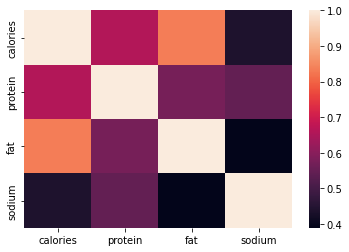

In [166]:
sns.heatmap(correlations)

In [167]:
correlations

calories   protein       fat    sodium
calories  1.000000  0.656935  0.835042  0.437157
protein   0.656935  1.000000  0.573694  0.545664
fat       0.835042  0.573694  1.000000  0.389348
sodium    0.437157  0.545664  0.389348  1.000000

# Standarizing values

In [168]:
x=data_after_out[con_cols]
x=DataFrame(StandardScaler().fit_transform(x),columns=con_cols)
x["Rating_Labels"]=Series(list(data_after_out["Rating_Labels"]))
x.describe()

calories       protein           fat        sodium
count  1.568900e+04  1.568900e+04  1.568900e+04  1.568900e+04
mean  -1.014479e-16 -2.898511e-17  1.811569e-18  5.615865e-17
std    1.000032e+00  1.000032e+00  1.000032e+00  1.000032e+00
min   -1.676197e+00 -9.643462e-01 -1.273301e+00 -1.018049e+00
25%   -7.456197e-01 -7.507239e-01 -7.521936e-01 -7.938339e-01
50%   -2.227458e-01 -3.946867e-01 -2.310867e-01 -3.240491e-01
75%    6.110883e-01  4.598025e-01  5.505737e-01  5.154243e-01
max    3.704567e+00  3.592929e+00  3.373236e+00  3.471599e+00

In [169]:
dis_scatter(x,con_cols)

# Principal Component Analysis

In [170]:
pca=PCA(n_components=3)

In [171]:
principalComponents = pca.fit_transform(x[list(x.columns)[:-1]])

In [172]:
x1=DataFrame(principalComponents,columns=['PCA_1','PCA_2','PCA_3'])
x1.describe()

PCA_1         PCA_2         PCA_3
count  1.568900e+04  1.568900e+04  1.568900e+04
mean  -3.985452e-17 -2.717354e-18 -1.177520e-17
std    1.655351e+00  8.477410e-01  6.207005e-01
min   -2.491225e+00 -3.157244e+00 -3.200147e+00
25%   -1.297447e+00 -4.604791e-01 -3.318955e-01
50%   -3.649234e-01 -6.780452e-02  5.023495e-03
75%    1.053346e+00  3.850702e-01  2.394431e-01
max    6.527081e+00  3.775894e+00  3.874414e+00

In [173]:
list_sum_of_cat=[]
for i in range(len(x)):
    temp=data_after_out[categorical_columns[:-1]].iloc[i].sum()
    #print("i is {} and sum is {}".format(i,temp))
    list_sum_of_cat.append(temp)
#list_sum_of_cat

In [174]:
x1["Combination_of_Categorical"]=list_sum_of_cat

In [175]:
x1["Rating_Labels"]=Series(list(x["Rating_Labels"]))

In [176]:
dis_scatter(x1,['PCA_1','PCA_2','PCA_3'])

In [177]:
x1

PCA_1     PCA_2     PCA_3  Combination_of_Categorical Rating_Labels
0      0.520938  0.869622  0.999955                        11.0       Average
1      1.544166  2.149168 -1.071377                        11.0     Excellent
2     -1.438811  0.126362  0.189947                         7.0          Good
3     -0.121454 -0.148576  0.058633                        17.0     Excellent
4      1.195903 -0.423513 -0.072681                        11.0          Good
...         ...       ...       ...                         ...           ...
15684 -2.274326  0.040190  0.220285                         9.0          Good
15685 -2.209771  0.225393  0.255598                         8.0          Good
15686  1.588795 -0.201107 -0.088135                        16.0     Excellent
15687  2.058850 -0.049200  0.201169                        15.0     Excellent
15688  2.111293  0.154035  1.450745                        13.0     Excellent

[15689 rows x 5 columns]

In [178]:
x1["Combination_of_Categorical"].isnull().sum()

0

In [179]:
x1["rating"]=list(Series(data_after_out["rating"]))

In [180]:
x1

PCA_1     PCA_2     PCA_3  Combination_of_Categorical Rating_Labels  \
0      0.520938  0.869622  0.999955                        11.0       Average   
1      1.544166  2.149168 -1.071377                        11.0     Excellent   
2     -1.438811  0.126362  0.189947                         7.0          Good   
3     -0.121454 -0.148576  0.058633                        17.0     Excellent   
4      1.195903 -0.423513 -0.072681                        11.0          Good   
...         ...       ...       ...                         ...           ...   
15684 -2.274326  0.040190  0.220285                         9.0          Good   
15685 -2.209771  0.225393  0.255598                         8.0          Good   
15686  1.588795 -0.201107 -0.088135                        16.0     Excellent   
15687  2.058850 -0.049200  0.201169                        15.0     Excellent   
15688  2.111293  0.154035  1.450745                        13.0     Excellent   

       rating  
0       2.500  
1       4.375  
2       3.750  
3       5.000  
4       3.125  
...       ...  
15684   3.750  
15685   3.125  
15686   4.375  
15687   4.375  
15688   4.375  

[15689 rows x 6 columns]

# Insight based on Vizualization Techniques

In [181]:
grouped_data=x1.groupby("Rating_Labels").count()

In [182]:
height=list(grouped_data["PCA_1"])
temp_dict2=DataFrame(grouped_data["rating"]).to_dict()
labels=list(temp_dict2['rating'].keys())
values=list(temp_dict2['rating'].values())
print(labels,values)

['Average', 'Bad', 'Excellent', 'Good', 'Very Bad'] [432, 224, 8260, 5294, 1479]


In [183]:
px.bar(x=labels,y=values,color=labels)




In [184]:
px.histogram(x=x1["PCA_1"])

In [185]:
px.histogram(x=x1["PCA_2"])

In [186]:
px.histogram(x=x1["PCA_3"])

In [187]:
x1

PCA_1     PCA_2     PCA_3  Combination_of_Categorical Rating_Labels  \
0      0.520938  0.869622  0.999955                        11.0       Average   
1      1.544166  2.149168 -1.071377                        11.0     Excellent   
2     -1.438811  0.126362  0.189947                         7.0          Good   
3     -0.121454 -0.148576  0.058633                        17.0     Excellent   
4      1.195903 -0.423513 -0.072681                        11.0          Good   
...         ...       ...       ...                         ...           ...   
15684 -2.274326  0.040190  0.220285                         9.0          Good   
15685 -2.209771  0.225393  0.255598                         8.0          Good   
15686  1.588795 -0.201107 -0.088135                        16.0     Excellent   
15687  2.058850 -0.049200  0.201169                        15.0     Excellent   
15688  2.111293  0.154035  1.450745                        13.0     Excellent   

       rating  
0       2.500  
1       4.375  
2       3.750  
3       5.000  
4       3.125  
...       ...  
15684   3.750  
15685   3.125  
15686   4.375  
15687   4.375  
15688   4.375  

[15689 rows x 6 columns]

In [188]:
Cate_Sum=Series(list_sum_of_cat)
ratingnew=Series(list(data_after_out["rating"]))
calnew=Series(list(data_after_out["calories"]))
pronew=Series(list(data_after_out["protein"]))
fatnew=Series(list(data_after_out["fat"]))
sodiumnew=Series(list(data_after_out["sodium"]))
data_after_out_final=DataFrame()

In [189]:
data_after_out_final["Calorie"]=calnew
data_after_out_final["Protein"]=pronew
data_after_out_final["Fat"]=fatnew
data_after_out_final["Sodium"]=sodiumnew
data_after_out_final["Ratings"]=ratingnew
data_after_out_final["Combination_of_Categorical"]=Cate_Sum

In [190]:
data_after_out_final

Calorie  Protein   Fat  Sodium  Ratings  Combination_of_Categorical
0        426.0     30.0   7.0   559.0    2.500                        11.0
1        403.0     18.0  23.0  1439.0    4.375                        11.0
2        165.0      6.0   7.0   165.0    3.750                         7.0
3        356.0     13.0  19.5   308.5    5.000                        17.0
4        547.0     20.0  32.0   452.0    3.125                        11.0
...        ...      ...   ...     ...      ...                         ...
15684     84.0      0.0   0.0     5.0    3.750                         9.0
15685     28.0      2.0   2.0    64.0    3.125                         8.0
15686    671.0     22.0  28.0   583.0    4.375                        16.0
15687    563.0     31.0  38.0   652.0    4.375                        15.0
15688    631.0     45.0  24.0   517.0    4.375                        13.0

[15689 rows x 6 columns]

Prediction of rating using Decision Tree Regressor, Initialization of dataset

In [206]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
mod=DecisionTreeRegressor()
X=data_after_out_final.drop(columns=['Ratings'],axis=1)
Y=data_after_out['rating']

Segregation of dataset to train and test the model

In [207]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.24)
mod.fit(x_train,y_train)

DecisionTreeRegressor()

Prediction and Conversion of rating into rating labels

In [208]:
def predict_labels(predicted_values):
    if(0<=predicted_values<=1):
        return "Very Bad"
    elif(1<predicted_values<=2):
        return "Bad"
    elif(2<predicted_values<=3):
        return "Average"
    elif(3<predicted_values<=4):
        return "Good"
    elif(4<predicted_values<=5):
        return "Excellent"

In [209]:
pred=mod.predict(x_test)
score=mod.score(x_train,y_train)
pred_label=[predict_labels(i) for i in pred]
true_labels=[predict_labels(i) for i in y_test]

Metrics of Model

In [210]:
accuracy=metrics.accuracy_score(true_labels,pred_label)
print(f"accuracy: {accuracy}")
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', (metrics.mean_squared_error(y_test, pred))**0.5)

accuracy: 0.40042485395645244
MAE: 1.2477595592140203
MSE: 3.5618081601832183
RMSE: 1.8872753270742502


Prediction of rating using Decision Tree Regressor (With PCA Values), Initialization of dataset

In [214]:
mod=DecisionTreeRegressor()
X=x1.drop(columns=['Rating_Labels','rating'],axis=1)
Y=x1['rating']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.24)
mod.fit(x_train,y_train)

DecisionTreeRegressor()

In [215]:
pred=mod.predict(x_test)
score=mod.score(x_train,y_train)
pred_label=[predict_labels(i) for i in pred]
true_labels=[predict_labels(i) for i in y_test]
accuracy=metrics.accuracy_score(true_labels,pred_label)
print(f"accuracy: {accuracy}")
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', (metrics.mean_squared_error(y_test, pred))**0.5)

accuracy: 0.4123738714816782
MAE: 1.2010422198619224
MSE: 3.3972757899628254
RMSE: 1.8431700382663627
